<a href="https://colab.research.google.com/github/kv1441/LR5_spam/blob/main/LR5_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Загрузка датасета
dataset = pd.read_csv('/content/drive/MyDrive/МО/spam.csv')

dataset['Category'] = dataset['Category'].replace({'spam': 0, 'ham': 1})

dataset.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Разделение на признаки (X) и целевую переменную (y)
X = dataset['Message']
y = dataset['Category']

In [ ]:
# Создание словаря для присвоения численных меток классам
label_mapping = {'spam': 0, 'ham': 1}

In [ ]:
# Преобразование меток в числа
y_numeric = y.map(label_mapping)

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создание и обучение векторизатора текста
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Создание и обучение наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train_vectorized.toarray(), y_train)

GaussianNB()

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test_vectorized.toarray())

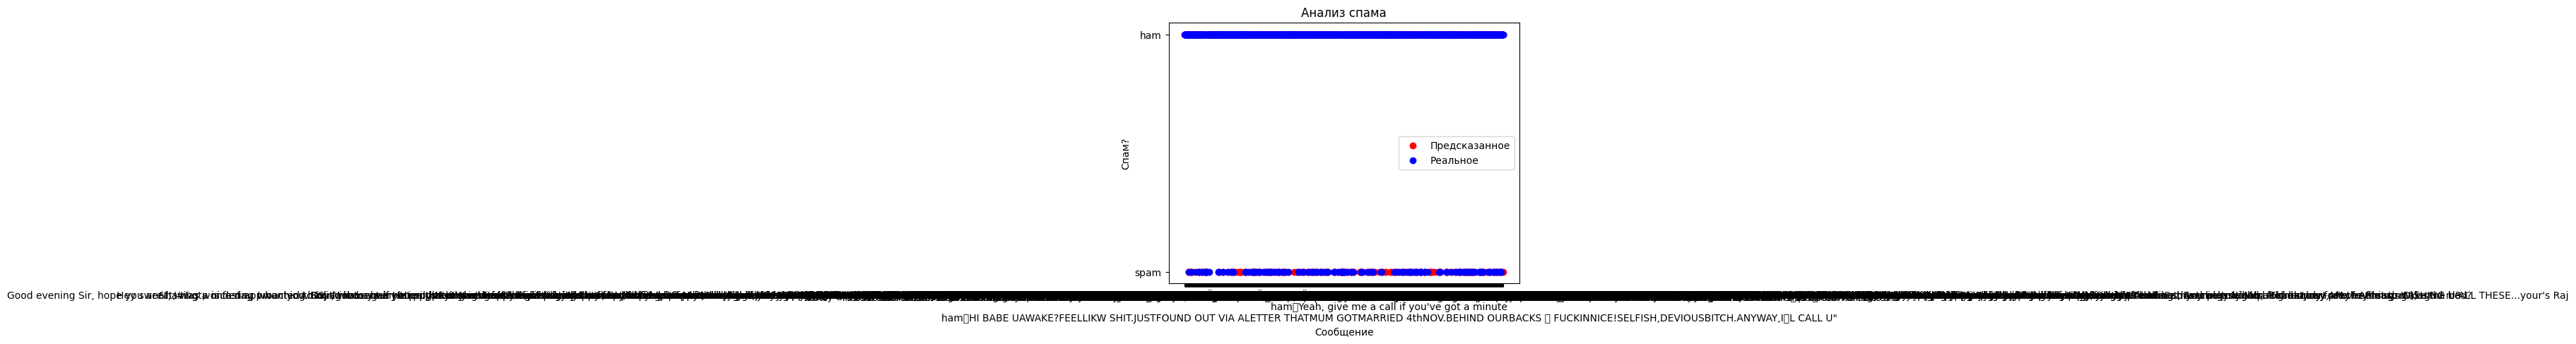

In [ ]:
# Создание графика
plt.scatter(X_test, y_pred, color='red', label='Предсказанное')
plt.scatter(X_test, y_test, color='blue', label='Реальное')

# Настройка осей и заголовка
plt.xlabel('Сообщение')
plt.ylabel('Спам?')
plt.title('Анализ спама')

# Установка меток для каждого класса
plt.yticks([0, 1], ['spam', 'ham'])

# Отображение легенды
plt.legend()

# Отображение графика
plt.show()

In [ ]:
# Оценка точности классификатора
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9049327354260089
